In [1]:
import os
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize
from torch import nn
import torch


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_directory = '/content/drive/My Drive/APS360_Project/Dataset/'
normal_dic = os.path.join(data_directory, 'n_image')
normal_mask = os.path.join(data_directory, 'n_masked')
tumour_dic = os.path.join(data_directory, 't_image')
tumour_mask = os.path.join(data_directory, 't_masked')



####
#Count number of data we have for normal and tumour
count = 0
for file in os.listdir(normal_dic):
  count += 1
normal_count = count

count = 0
for file in os.listdir(tumour_dic):
  count += 1
tumour_count = count


####
#Single image testing
'''
plt.figure()
img = os.path.join(tumour_dic, '3.png')

img = plt.imread(img)
row = len(img)
col = len(img[0])
print('There are', row,'columns and', col,'columns')

plt.imshow(img)
#print(img)
'''





"\nplt.figure()\nimg = os.path.join(tumour_dic, '3.png')\n\nimg = plt.imread(img)\nrow = len(img)\ncol = len(img[0])\nprint('There are', row,'columns and', col,'columns')\n\nplt.imshow(img)\n#print(img)\n"

In [4]:
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):    
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice


criterion = DiceLoss()

16
tensor(0.2003)
189
tensor(0.1643)
252
tensor(0.2712)


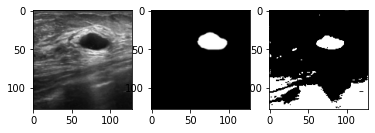

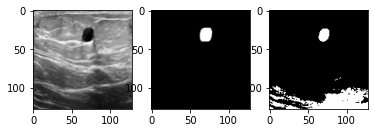

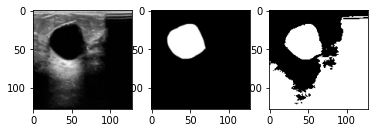

In [17]:
####
#Plotting and comparison
#Define the image index we want to work with
tumour_index = [16, 189, 252]
normal_index = [0,46,98]
total_loss = 0

for index in tumour_index:
  print(index)
  datapath = os.path.join(tumour_dic, str(index)+'.png')
  img = plt.imread(datapath)
  img = resize(img, output_shape=(128, 128))
  row = len(img)
  col = len(img[0])
  for i in range(row):
    for j in range(col):
      if sum(img[i][j][0:3]) <= 0.5:  #If the pixel RBG value is below threshold, it will be classified as positive
        img[i][j][0:3] = 1
      else:
        img[i][j][0:3] = 0
  
  #Plotting original image
  plt.figure()
  plt.subplot(1,3,1)
  img_datapath = os.path.join(tumour_dic, str(index)+'.png')
  img_img = plt.imread(img_datapath)
  img_img = resize(img_img, output_shape=(128, 128))
  plt.imshow(img_img)

  #Plotting desired output
  plt.subplot(1,3,2)
  mask_datapath = os.path.join(tumour_mask, str(index)+'.png')
  mask_img = plt.imread(mask_datapath)
  mask_img = resize(mask_img, output_shape=(128, 128))
  plt.imshow(mask_img)

  #Plotting baseline output
  plt.subplot(1,3,3)
  plt.imshow(img)

  img_torch = torch.from_numpy(img)
  mask_img_torch = torch.from_numpy(mask_img)
  loss = criterion(img_torch, mask_img_torch)
  print(1-loss)

In [14]:
####
#Calculation of average loss, not plotting
#Define the image index we want to work with
#tumour_index = [16, 189, 252]

tumour_index = range(0,100)

normal_index = [0,46,98]
total_loss = 0

for index in tumour_index:
  print(index)
  datapath = os.path.join(tumour_dic, str(index)+'.png')
  img = plt.imread(datapath)
  img = resize(img, output_shape=(128, 128))
  row = len(img)
  col = len(img[0])
  for i in range(row):
    for j in range(col):
      if sum(img[i][j][0:3]) <= 0.5:  #If the pixel RBG value is below threshold, it will be classified as positive
        img[i][j][0:3] = 1
      else:
        img[i][j][0:3] = 0
  
  '''#Plotting masked output
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(img)

  #Plotting desired output
  plt.subplot(1,2,2)
  mask_datapath = os.path.join(tumour_mask, str(index)+'.png')
  mask_img = plt.imread(mask_datapath)
  mask_img = resize(mask_img, output_shape=(128, 128))
  plt.imshow(mask_img)'''

  img_torch = torch.from_numpy(img)
  mask_img_torch = torch.from_numpy(mask_img)
  loss = criterion(img_torch, mask_img_torch)
  total_loss += 1-loss
  #print(1-loss)





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


tensor(0.0056)


tensor(6.8843e-05)
tensor(0.0007)
tensor(3.4571e-05)


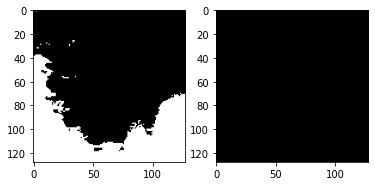

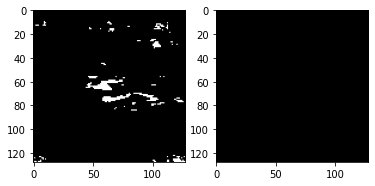

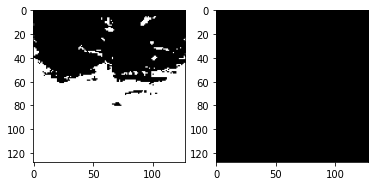

In [45]:
for index in normal_index:
  datapath = os.path.join(normal_dic, str(index)+'.png')
  img = plt.imread(datapath)
  img = resize(img, output_shape=(128, 128))
  row = len(img)
  col = len(img[0])
  for i in range(row):
    for j in range(col):
      if sum(img[i][j][0:3]) <= 0.5:  #If the pixel RBG value is below threshold, it will be classified as positive
        img[i][j][0:3] = 1
      else:
        img[i][j][0:3] = 0
  
  #Plotting masked output
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(img)

  #Plotting desired output
  plt.subplot(1,2,2)
  mask_datapath = os.path.join(normal_mask, str(index)+'.png')
  mask_img = plt.imread(mask_datapath)
  mask_img = resize(mask_img, output_shape=(128, 128))
  plt.imshow(mask_img)

  img_torch = torch.from_numpy(img)
  mask_img_torch = torch.from_numpy(mask_img)
  loss = criterion(img_torch, mask_img_torch)
  print(1-loss)

In [ ]:
####
'''#Remove lines that are classified as positive incorrectly
for i in range(row):
  sum_pixel = 0
  for j in range(col):
    sum_pixel += new_img[i][j][1]
  if sum_pixel > (col-70):
    for k in range(col):
      new_img[i][k][0:3] = 0
plt.imshow(new_img)'''

In [ ]:
'''#Reduce noise of image
img2 = os.path.join(tumour_dic, '20.png')
img2 = cv2.imread(img2)
cv2.fastNlMeansDenoising(img2)
plt.imshow(img2)
print(img2)'''

In [ ]:
####
'''
new_img = img2
print(new_img)


for i in range(row):
  for j in range(col):
    if int(sum(new_img[i][j][0:2])/3) <= 10:
      new_img[i][j][0:3] = 1
    else:
      new_img[i][j][0:3] = 0

plt.imshow(new_img)
print(sum(new_img))'''


